In [1]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()
train_path = os.path.join(cur_path, "Final_Training\\Images\\")

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join("Final_Training\\Images\\",str(i).zfill(5))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading as image, filename:", a)

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
# Checking data shape
print(data.shape, labels.shape)

Error loading as image, filename: GT-00000.csv
Error loading as image, filename: GT-00001.csv
Error loading as image, filename: GT-00002.csv
Error loading as image, filename: GT-00003.csv
Error loading as image, filename: GT-00004.csv
Error loading as image, filename: GT-00005.csv
Error loading as image, filename: GT-00006.csv
Error loading as image, filename: GT-00007.csv
Error loading as image, filename: GT-00008.csv
Error loading as image, filename: GT-00009.csv
Error loading as image, filename: GT-00010.csv
Error loading as image, filename: GT-00011.csv
Error loading as image, filename: GT-00012.csv
Error loading as image, filename: GT-00013.csv
Error loading as image, filename: GT-00014.csv
Error loading as image, filename: GT-00015.csv
Error loading as image, filename: GT-00016.csv
Error loading as image, filename: GT-00017.csv
Error loading as image, filename: GT-00018.csv
Error loading as image, filename: GT-00019.csv
Error loading as image, filename: GT-00020.csv
Error loading

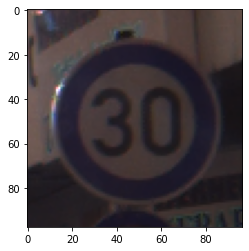

In [3]:
#Visualize the data
i_path = r"Final_Training\Images\00001\00072_00027.ppm"
plt.imshow(cv2.imread(i_path, -1))

Text(0, 0.5, 'Number of images')

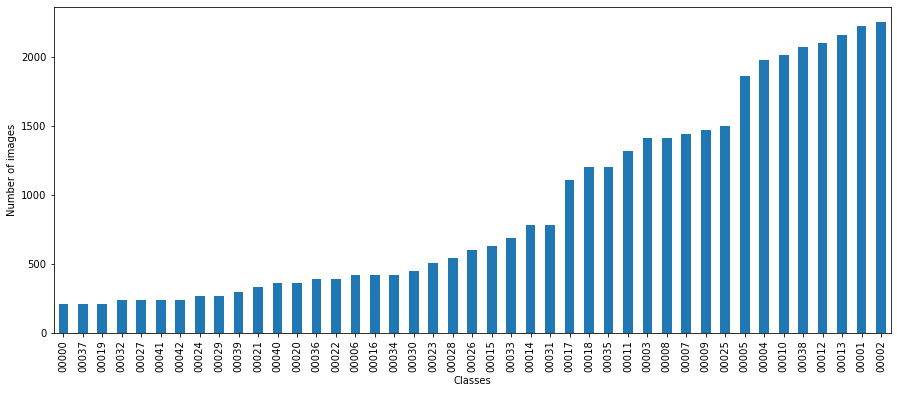

In [4]:
# number of images in each class
data_dic = {}
for folder in os.listdir(train_path):
    # Remve one since there is .csv file in each folder
    data_dic[folder] = len(os.listdir(train_path + '/' + folder)) - 1

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [5]:
# Classes percentages accross all the data
data_dic.values()
class_data_num = []
for key in data_dic.keys():
    print("Class:", int(key), "Ratio is:", round(data_dic[key]/data.shape[0]*100, 2), "% and has:", data_dic[key], "items.")
    class_data_num.append(data_dic[key])
print("The maximum number of images in a class is:", max(data_df))

Class: 0 Ratio is: 0.54 % and has: 210 items.
Class: 1 Ratio is: 5.66 % and has: 2220 items.
Class: 2 Ratio is: 5.74 % and has: 2250 items.
Class: 3 Ratio is: 3.6 % and has: 1410 items.
Class: 4 Ratio is: 5.05 % and has: 1980 items.
Class: 5 Ratio is: 4.74 % and has: 1860 items.
Class: 6 Ratio is: 1.07 % and has: 420 items.
Class: 7 Ratio is: 3.67 % and has: 1440 items.
Class: 8 Ratio is: 3.6 % and has: 1410 items.
Class: 9 Ratio is: 3.75 % and has: 1470 items.
Class: 10 Ratio is: 5.13 % and has: 2010 items.
Class: 11 Ratio is: 3.37 % and has: 1320 items.
Class: 12 Ratio is: 5.36 % and has: 2100 items.
Class: 13 Ratio is: 5.51 % and has: 2160 items.
Class: 14 Ratio is: 1.99 % and has: 780 items.
Class: 15 Ratio is: 1.61 % and has: 630 items.
Class: 16 Ratio is: 1.07 % and has: 420 items.
Class: 17 Ratio is: 2.83 % and has: 1110 items.
Class: 18 Ratio is: 3.06 % and has: 1200 items.
Class: 19 Ratio is: 0.54 % and has: 210 items.
Class: 20 Ratio is: 0.92 % and has: 360 items.
Class: 21 R

In [6]:
# Plotting image before and after data augmentation 
def pltBefAfter(img1,img2):
    fig = plt.figure(figsize=(10, 7))
    # setting values to rows and column variables
    rows = 1
    columns = 2

    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, 1)
  
    # showing image
    plt.imshow(img1)
    plt.axis('off')
    plt.title("First")
  
    # Adds a subplot at the 2nd position
    fig.add_subplot(rows, columns, 2)
  
    # showing image
    plt.imshow(img2)
    plt.axis('off')
    plt.title("Second")

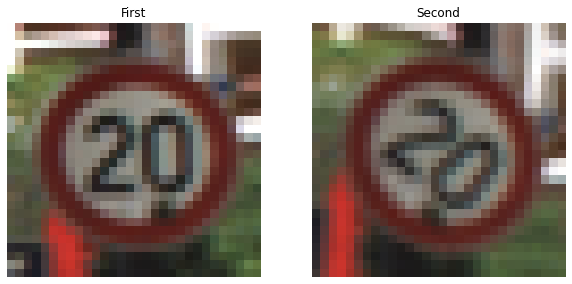

In [7]:
# Data Balancing (Using image augmentation)  Sample to show our balancing technique
from skimage import transform

# Perform swirl
transformed_img = transform.swirl(data[200], strength=1,cval=255)
transformed_img2 = transform.swirl(data[200], strength=-1,cval=255)

pltBefAfter(data[200], transformed_img2)

In [8]:
from math import floor
# Maximum number of inputs for the largest class
max_num_data = round(max(data_df) * 0.9)
#max_num_data = 2220
# Counter to count 
c = 0
data_new = []
labels_new = []
# Apply image augmentation to balance the data.
for i in range(classes):
    # Starting and Ending position of each class
    start_itr = c
    end_itr = c + class_data_num[i]
    itr = start_itr
    #print("Start at:", start_itr, "End at:", end_itr, "Difference:", end_itr - start_itr, "Real Count:", class_data_num[i])
    # Copying Data
    while(itr < end_itr):
        data_new.append(data[itr])
        labels_new.append(labels[itr])
        itr = itr + 1
        c = c + 1

    # If class is under sampled
    if(class_data_num[i] < max_num_data):
        gen_num = floor( ( (max_num_data/class_data_num[i]) - 1 ) * class_data_num[i])
        # Iterator to iterate of class data images
        itr = 0
        # Swirl strength fator
        sf = 0
        #print(gen_num)
        # Image augmentation Procss
        while(gen_num > 0):
            data_new.append(transform.swirl(data[start_itr + itr], strength=(0.1 + 0.1 * sf), cval = 255))
            labels_new.append(labels[start_itr + itr])                         # start_itr+itr can be replaced with i
            itr = itr + 1
            sf = sf + 1
            gen_num = gen_num - 1
            if(sf > 9):
                sf = 0
            if(itr >= class_data_num[i]):
                itr = 0

# Converting lists into numpy arrays            
data_new = np.array(data_new)
labels_new = np.array(labels_new)
# Checking data shape after balancing
print(data_new.shape)

(87747, 30, 30, 3)


Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42] 

Count Per Class: [2025 2220 2250 2025 2024 2024 2025 2025 2025 2025 2024 2025 2100 2160
 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025
 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2070 2025 2025 2025
 2025]


Text(0, 0.5, 'Number of images')

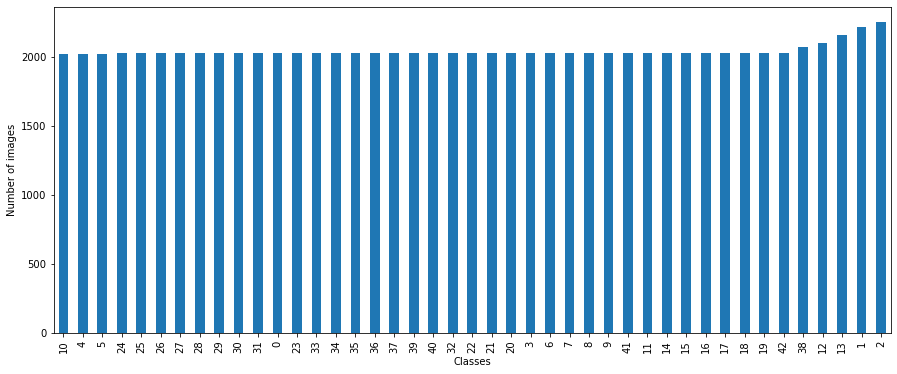

In [9]:
unique, counts = np.unique(labels_new, return_counts=True)
print("Classes:", unique, "\n")
print("Count Per Class:", counts)
# number of images in each class after image augmentation (Data balancing)
data_dic = {}
for i in range(classes):
    # Remve one since there is .csv file in each folder
    data_dic[i] = counts[i]

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [19]:
x_train = np.array(data_new)
x_train = x_train / 255
y_train = np.array(labels_new).astype(np.float)

# Splitting training and validation dataset
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

<ipython-input-19-ccd4cee9d15c>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.array(labels_new).astype(np.float)


(70197, 30, 30, 3) (17550, 30, 30, 3) (70197,) (17550,)


In [20]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *
import tensorflow as tf
from tensorflow.keras import *

# Construct Model
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu', 
                 input_shape = (30, 30, 3), data_format = 'channels_last',
                 kernel_regularizer = regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(BatchNormalization())

# replace maxpooling with conv2d
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = "same", strides = (2, 2),
                kernel_regularizer = regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128, kernel_size = (5,5), activation = 'relu' ,
                 kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# replace maxpooling with conv2d
model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = "same",
                 kernel_regularizer = regularizers.l1_l2(l1=1e-4, l2=1e-3), strides = (2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1024, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(Dropout(0.4))
model.add(Dense(256, activation = 'relu',  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax',  kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        4864      
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        102464    
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 128)         204928    
_________________________________________________________________
batch_normalization_6 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 9, 9, 128)        

In [ ]:
!pip install visualkeras
import visualkeras

visualkeras.layered_view(model)

In [21]:
# Train Model
callback = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=8, verbose=1, min_lr = 2e-6)
opt = Adam(learning_rate = 1e-3)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train ,y_train,  batch_size = 128, epochs=200, validation_data = (x_valid, y_valid), callbacks=[callback, reduce_lr], shuffle = True)

Epoch 1/200
549/549 [==============================] - 321s 582ms/step - loss: 7.4766 - accuracy: 0.5169 - val_loss: 4.3107 - val_accuracy: 0.6524
Epoch 2/200
549/549 [==============================] - 312s 568ms/step - loss: 2.7888 - accuracy: 0.8496 - val_loss: 2.2476 - val_accuracy: 0.9305
Epoch 3/200
549/549 [==============================] - 302s 550ms/step - loss: 2.1851 - accuracy: 0.8874 - val_loss: 1.9219 - val_accuracy: 0.9187
Epoch 4/200
549/549 [==============================] - 302s 550ms/step - loss: 1.9631 - accuracy: 0.8991 - val_loss: 1.8591 - val_accuracy: 0.9154
Epoch 5/200
549/549 [==============================] - 321s 586ms/step - loss: 1.8182 - accuracy: 0.9101 - val_loss: 1.7224 - val_accuracy: 0.9256
Epoch 6/200
549/549 [==============================] - 319s 580ms/step - loss: 1.7117 - accuracy: 0.9159 - val_loss: 1.6064 - val_accuracy: 0.9479
Epoch 7/200
549/549 [==============================] - 320s 582ms/step - loss: 1.6445 - accuracy: 0.9199 - val_loss: 1

549/549 [==============================] - 310s 565ms/step - loss: 0.3088 - accuracy: 0.9917 - val_loss: 0.2788 - val_accuracy: 0.9980
Epoch 56/200
549/549 [==============================] - 284s 517ms/step - loss: 0.3067 - accuracy: 0.9914 - val_loss: 0.2766 - val_accuracy: 0.9979
Epoch 57/200
549/549 [==============================] - 284s 517ms/step - loss: 0.3041 - accuracy: 0.9921 - val_loss: 0.2752 - val_accuracy: 0.9979
Epoch 58/200
549/549 [==============================] - 283s 515ms/step - loss: 0.3017 - accuracy: 0.9924 - val_loss: 0.2726 - val_accuracy: 0.9980
Epoch 59/200
549/549 [==============================] - 283s 515ms/step - loss: 0.2993 - accuracy: 0.9923 - val_loss: 0.2712 - val_accuracy: 0.9978
Epoch 60/200
549/549 [==============================] - 283s 515ms/step - loss: 0.2982 - accuracy: 0.9929 - val_loss: 0.2700 - val_accuracy: 0.9979
Epoch 61/200
549/549 [==============================] - 283s 515ms/step - loss: 0.2983 - accuracy: 0.9922 - val_loss: 0.2692 

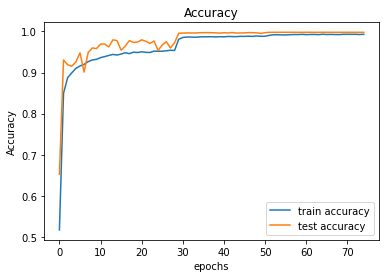

In [22]:
plt.figure(0)
plt.plot(history.history['accuracy'], label= 'train accuracy')
plt.plot(history.history['val_accuracy'], label= 'test accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

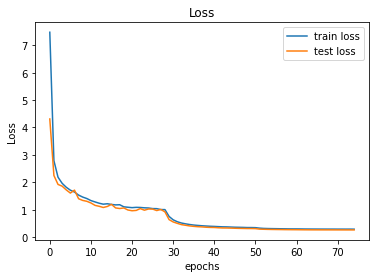

In [23]:
plt.figure(0)
plt.plot(history.history['loss'], label= 'train loss')
plt.plot(history.history['val_loss'], label= 'test loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

In [42]:
from tensorflow.keras.models import load_model
# Saving the Model 
tf.keras.models.save_model(model, 'German_Traffic_Sign_Recognition_CNN')

INFO:tensorflow:Assets written to: German_Traffic_Sign_Recognition_CNN\assets


In [ ]:
test = pd.read_csv('GT-final_test.csv')
y_test = test["ClassId"].values
imgs = test["Path"].values
data =[]
for img in imgs:
    image = cv2.imread('../input/gtsrb-german-traffic-sign/' +img)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((30, 30))
    data.append(np.array( resize_image ))

x_test = np.array(data)
x_test = x_test/255
model.evaluate(x_test, y_test)